In [ ]:

pip install transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 77.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 64.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 88.3 MB/s eta 0:00:00


In [ ]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import the necessary libraries and modules
from transformers import AutoTokenizer, AutoModelForTokenClassification, AutoModelForSequenceClassification
from transformers import pipeline
import pandas as pd

In [ ]:
# Check if CUDA is available
import torch
print(torch.cuda.is_available())

True


In [ ]:
pip install Xformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 MB 6.1 MB/s eta 0:00:00


In [ ]:
# Set the device to GPU if available, otherwise use CPU
device = 0 if torch.cuda.is_available() else -1
# Load the pre-trained model for sequence classification
model = AutoModelForSequenceClassification.from_pretrained("/content/drive/MyDrive/saved_final_model_sa").to(device)
# Read the data from a TSV file into a DataFrame
df1 = pd.read_csv('/content/drive/MyDrive/data_refugee_SA_sorted.tsv', sep='\t', header = 0)
# Load the tokenizer for German sentiment analysis
tokenizer=AutoTokenizer.from_pretrained("oliverguhr/german-sentiment-bert")
# Create a sentiment analysis pipeline using the pre-trained model
nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer, device=device)


In [ ]:
# Perform sentiment analysis on each content in the DataFrame and store the results
results = []
for i, test in enumerate(df1["content"]):
    sentiment_prediction = nlp(test, truncation=True, max_length=512)
    pubtime = df1.loc[i, "pubtime"]
    results.append((pubtime, sentiment_prediction))

# Print the results
print(results)

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1081: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


[('2022-02-01 06:30:46+01:00', [{'label': 'neutral', 'score': 0.996307373046875}]), ('2022-02-01 11:49:16+01:00', [{'label': 'negative', 'score': 0.9992076754570007}]), ('2022-02-02 00:00:00+01:00', [{'label': 'neutral', 'score': 0.9966784715652466}]), ('2022-02-02 00:00:00+01:00', [{'label': 'negative', 'score': 0.9996620416641235}]), ('2022-02-02 04:04:10+01:00', [{'label': 'negative', 'score': 0.9997121691703796}]), ('2022-02-02 05:30:00+01:00', [{'label': 'negative', 'score': 0.9971515536308289}]), ('2022-02-02 05:48:40+01:00', [{'label': 'negative', 'score': 0.9987583160400391}]), ('2022-02-03 00:00:00+01:00', [{'label': 'neutral', 'score': 0.9976988434791565}]), ('2022-02-03 00:00:00+01:00', [{'label': 'negative', 'score': 0.999477207660675}]), ('2022-02-03 05:30:00+01:00', [{'label': 'neutral', 'score': 0.998914361000061}]), ('2022-02-05 00:00:00+01:00', [{'label': 'neutral', 'score': 0.9971187114715576}]), ('2022-02-06 10:49:10+01:00', [{'label': 'neutral', 'score': 0.997584939

In [ ]:
# Extracting labels from sentiment analysis results
results_mod = [(dt, res[0]['label']) for dt, res in results]


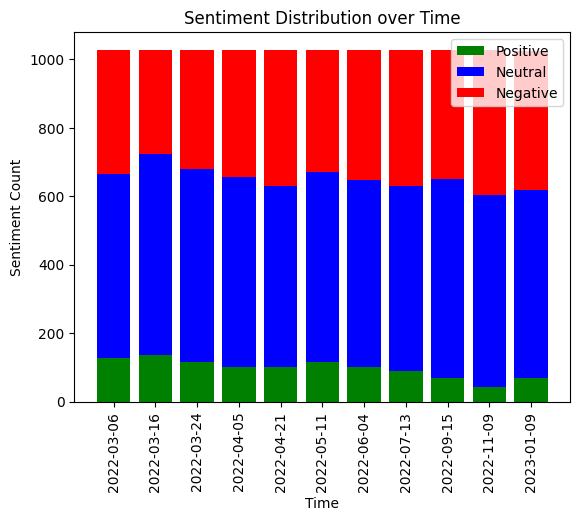

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

from datetime import datetime

# Convert datetime strings to datetime objects and extract labels
results_mod = [(datetime.strptime(dt, "%Y-%m-%d %H:%M:%S%z").date(), res[0]['label']) for dt, res in results]

# Create batches of size 1028
batch_size = 1028
batches = [results_mod[i:i + batch_size] for i in range(0, len(results_mod), batch_size)]

batch_times = [batch[-1][0] for batch in batches]  # Take the time of the last element in each batch
batch_labels = [[res[1] for res in batch] for batch in batches]

batch_label_counts = [Counter(batch) for batch in batch_labels]

# separate each sentiment count
positive_counts = [batch_label_count['positive'] for batch_label_count in batch_label_counts]
negative_counts = [batch_label_count['negative'] for batch_label_count in batch_label_counts]
neutral_counts = [batch_label_count['neutral'] for batch_label_count in batch_label_counts]

# Create an array with the positions of each bar along the x-axis
x_pos = np.arange(len(batch_times))

# Creating a stacked bar plot to visualize sentiment distribution
plt.bar(x_pos, positive_counts, color='g', label='Positive')
plt.bar(x_pos, neutral_counts, bottom=positive_counts, color='b', label='Neutral')
plt.bar(x_pos, negative_counts, bottom=np.array(positive_counts) + np.array(neutral_counts), color='r', label='Negative')

# Adding labels
plt.xticks(x_pos, batch_times, rotation='vertical')
plt.xlabel('Time')
plt.ylabel('Sentiment Count')
plt.title('Sentiment Distribution over Time')
plt.legend()

plt.show()

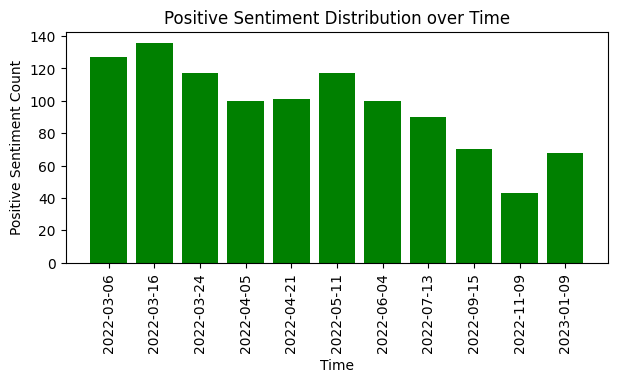

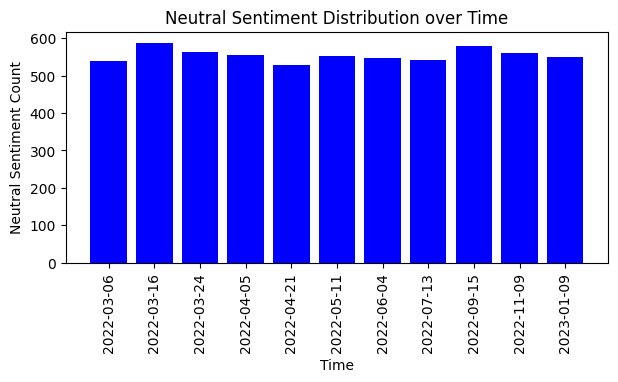

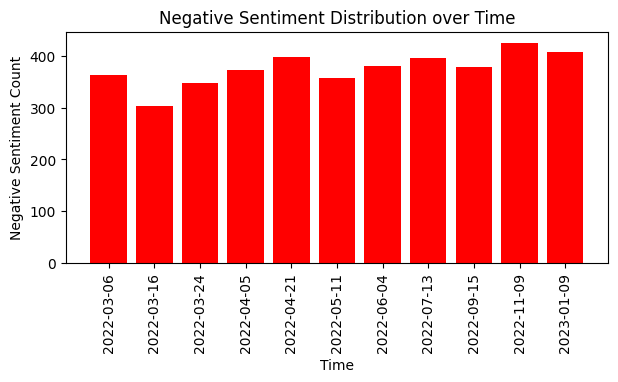

In [ ]:
# Positive sentiment over time
plt.figure(figsize=(7,3))
plt.bar(x_pos, positive_counts, color='g')
plt.xticks(x_pos, batch_times, rotation='vertical')
plt.xlabel('Time')
plt.ylabel('Positive Sentiment Count')
plt.title('Positive Sentiment Distribution over Time')
plt.show()

# Neutral sentiment over time
plt.figure(figsize=(7,3))
plt.bar(x_pos, neutral_counts, color='b')
plt.xticks(x_pos, batch_times, rotation='vertical')
plt.xlabel('Time')
plt.ylabel('Neutral Sentiment Count')
plt.title('Neutral Sentiment Distribution over Time')
plt.show()

# Negative sentiment over time
plt.figure(figsize=(7,3))
plt.bar(x_pos, negative_counts, color='r')
plt.xticks(x_pos, batch_times, rotation='vertical')
plt.xlabel('Time')
plt.ylabel('Negative Sentiment Count')
plt.title('Negative Sentiment Distribution over Time')
plt.show()